#This notebook is to set up how you run GPU Locally.

#Setting up your environment

 This will guide you through a basic setup for an Ubuntu Linux deploy into Docker -> Colab.

#SECURITY:
- Do not run any notebooks for things that you do not trust.
- Through local connection setup; the notebook will be able to execute (read, write, delete) files on your local computer.
#- eg; commands such as "rm -rf/"
#!WILL RUN ON YOUR LOCAL COMPUTER!.

There are two options - the option for this is to run with GPU pulling from your local GPU.  If you are wanting to run from Colab's GPU, or you don't have the compute power, ignore these steps and select TPU from Colab.  



#Installation for GPU support on your desktop.

##NVIDIA CUDA Installation Guide for Linux:

https://docs.nvidia.com/cuda/cuda-installation-guide-linux/

- ensure you have:
  - CUDA-Capable GPU
  - Supported version of Linux with a gcc compiler and toolchain
  - CUDA Toolkit installed (next step)

  The following are commands to enter.  These commands you run from terminal *not from inside colab*.  

  


1. Verify you have CUDA Capable GPU

  If you have one GPU:

   `lspci | grep -i nvidia`
  If you have multiple GPU:

  `lspci | grep ' VGA ' | cut -d" " -f 1 | xargs -i lspci -v -s {}`

  Grab the output; the ID shown isn't the name of the graphics card.  Look up the number you have in this table for the name of your GPU: *(assuming you do not know it).*
  https://download.nvidia.com/XFree86/Linux-x86_64/535.98/README/supportedchips.html
  *(Tip - it will be on the right, and then refer to the item on the left).*
  
  Then look up the name in the following table to see if your GPU is supported in the following, and what the Compute Capability is.

  https://developer.nvidia.com/cuda-gpus

  *(Tip - you need to click on the icon of the item listed from your grep.  It will drop down to show you if it is compute compatable).*

  If you are not listed; check you are not a legacy product here:
  https://developer.nvidia.com/cuda-legacy-gpus

  If you do not see anything; update the PCI hardware ->
  `update-pciids` (generally found in `/sbin`); then run the previous command again.

  

2. Verify you have a supported Linux Version.

  If you do not know your details; type the following:

    `uname -m && cat /etc/*release`

  Check in the CUDA Toolkit Release notes;
  (Current - https://docs.nvidia.com/cuda/cuda-toolkit-release-notes/index.html but you should check if it is latest when you run this).

  3. Verify GCC installed

  `gcc --version`

  If you do not have any (error result) you will need to install this.


4. Kernel Headers and Dev packages installed

  `uname -r`

  *(Tip; if you update your Kernel, you need to run this and subsequent again).

  

  5. Install GPUDirect storage
  *NB - this is only available for ->

    Ubuntu 20.04, Ubuntu 22.04, Ubuntu 24.04

    RHEL 8.y (y <= 10), RHEL 9.y (y <= 4)

  Why do I want this?   enable a direct data path for direct mem access (DMA) between GPU mem and storage; avoids bounce buffer through CPU.

  https://docs.nvidia.com/gpudirect-storage/troubleshooting-guide/index.html#mofed-req-install
  

  6. Download NVIDIA Toolkit

  Select the version for your system:
  https://developer.nvidia.com/cuda-downloads


 -  `wget https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64/cuda-keyring_1.1-1_all.deb`
  
 - `sudo dpkg -i cuda-keyring_1.1-1_all.deb`
  
 - `sudo apt-get update`
  
 - `sudo apt-get -y install cuda-toolkit-12-6`

Install Driver - choose open kern (1) or legacy (2)

  1. `sudo apt-get install -y nvidia-open`
  2. `sudo apt-get install -y cuda-drivers`

To switch -> follow here: https://docs.nvidia.com/cuda/cuda-installation-guide-linux/#switching-between-driver-module-flavors


  7. Package manager install
  refer here: https://docs.nvidia.com/cuda/cuda-installation-guide-linux/#overview

  

You will need to choose to do Option 1 or 2 below; then continue on.

Option 1:
Start a Docker image:
Install Docker image or mirror to your loc:

`docker run --gpus=all -p 127.0.0.1:9000:8080 us-docker.pkg.dev/colab-images/public/runtime`

or

`docker run --gpus=all -p 127.0.0.1:9000:8080 asia-docker.pkg.dev/colab-images/public/runtime`

or

`docker run --gpus=all -p 127.0.0.1:9000:8080 europe-docker.pkg.dev/colab-images/public/runtime`

(NB: This can be run from Jupyter instead; but this is what I prefer).

Option 2:
Alternatively; if you want to run from a Jupyter notebook, after install jupyter, run through this:


```
  jupyter notebook \
    --NotebookApp.allow_origin='https://colab.research.google.com' \
    --port=8888 \
    --NotebookApp.port_retries=0
```

NB: You need to flag to trust WebSocket connections.



 Browser-specific settings

Note: If you're using Mozilla Firefox, you'll need to set thenetwork.websocket.allowInsecureFromHTTPS preference within the Firefox config editor. Colab makes a connection to your local kernel using a WebSocket. By default, Firefox disallows connections from HTTPS domains using standard WebSockets.

To do this; you need to go to mozilla, open about:config, search for the above and set it to 'true' (default is false).  

Whether you did option 1 or 2; you will need to grab the keys and token from the output of your terminal to:
* Open it in a browser
* Paste this into Google Colab.

Copy the output (link and token / keys and token).

Go back to Google Colab.  Select Local Runtime.



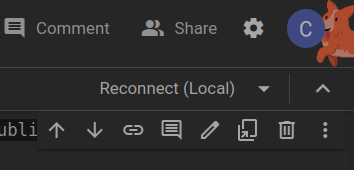

Select the down arrow and this following will pop up.  You need to paste the link you copied into the below where is specifies 'Please enter a valid backend URL'.  Click 'Connect'.

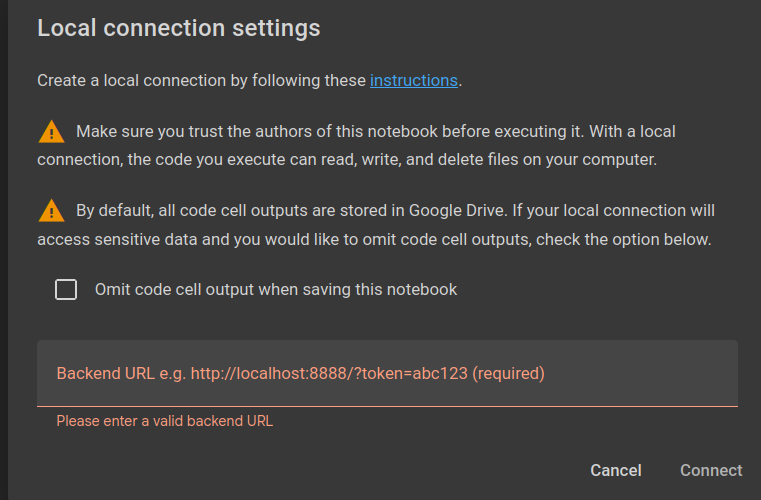

It will now run as your local GPU.

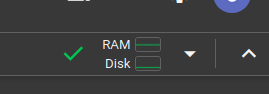

Check by selecting resources (or running the below commands).

You will need to follow the below steps to ensure it is set to GPU.  If you find it isn't; you will need to go to the Runtime type and select GPU to switch on the notebook to GPU. (This will restart a few times for the above steps).  You will need to check that GPU is enabled by running the scripts below.

In [1]:
#  Import libraries.
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [3]:
#  Import all functions here
#  Function to apply colours for plot
def pltcolor(lst):
    cols = []
    for line in lst:
        if line == 0:
            cols.append('pink')
        elif line == 1:
            cols.append('purple')
        else:
            cols.append('green')
    return cols

In [4]:
#  Check that everything is set up correctly, and version of installed items.
print("===============================")
print("-------------------------------")
print("Version of Tensorflow: ", tf.__version__)
print("Version of Tensorflow: ", keras. __version__)
print("Version of Numpy: ", np.__version__)
print("Version of Pandas: ", pd.__version__)
print("Version of Matplotlib: ", matplotlib.__version__)
print("Version of Seaborn: ", sns.__version__)
print("-------------------------------")
print("===============================")

-------------------------------
Version of Tensorflow:  2.15.0
Version of Tensorflow:  2.15.0
Version of Numpy:  1.25.2
Version of Pandas:  2.0.3
Version of Matplotlib:  3.7.1
Version of Seaborn:  0.13.1
-------------------------------


#This will tell if you are using a GPU.  If you are not, it will error / have no GPU there.  

If you have no GPU, you can still run your notebook - it will just be slow. :|

Steps: Either connect to Colab and use thiers or go back to the initial steps and debug.  
Of note - you do need to select GPU in notebook settings.
Colab defaults to what you used last - so if you had previously run out of Colab GPU and switched to CPU, it will default to that when you set up local

#Example error below

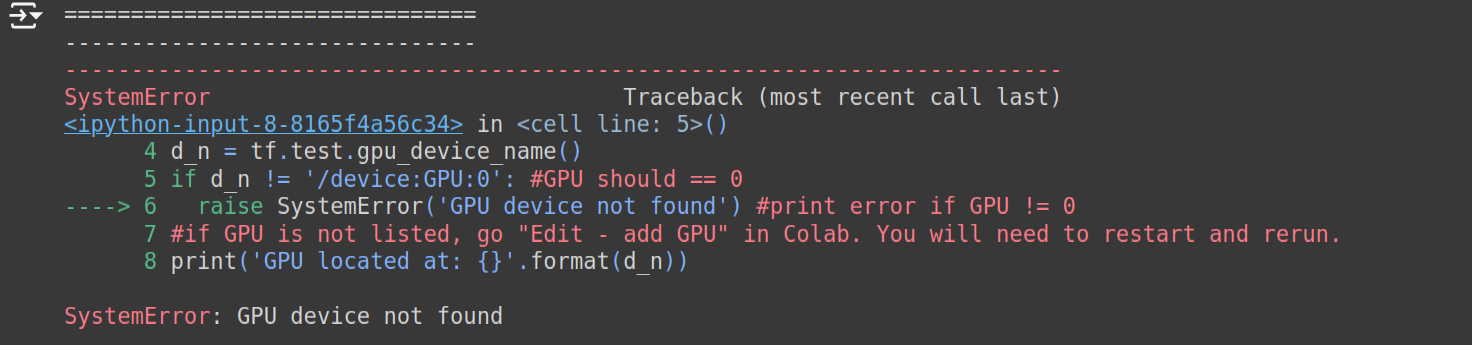

In [5]:
#  Check if there is a GPU
print("===============================")
print("-------------------------------")
d_n = tf.test.gpu_device_name()
if d_n != '/device:GPU:0':  # GPU should == 0
    raise SystemError('GPU device not found')  # Print error if GPU != 0
#  If GPU is not listed, go "Edit - add GPU" in Colab.
#  You will need to restart and rerun.
print('GPU located at: {}'.format(d_n))
print("GPU located at : ", tf.test.gpu_device_name())
print("# of GPUs : ", len(tf.config.experimental.list_physical_devices('GPU')))
print("-------------------------------")
print("===============================")

-------------------------------
GPU located at: /device:GPU:0
GPU located at :  /device:GPU:0
# of GPUs :  1
-------------------------------


If this displays correctly with 1 GPU - you have successfully completed these steps!

In [7]:
#  Import the file from Colab Content
#  Note; if you are running this locally,
#  you need to add the file to the 'content' folder
#  in Colab.  Of note; this only saves per instance; if you restart,
#  it will not remain there.
df = pd.read_csv('diabetes_prediction_dataset.csv')  # This is the datafile.
print("======================================================================")
print('File has been sucessfully loaded from your Google Drive into notebook')
print("----------------------------------------------------------------------")
print("Checking file for data errors")
print("Check for NaN values, and display here:")
print("----------------------------------------------------------------------")
df.isna().sum()
print("----------------------------------------------------------------------")
print("Check for any null values where python hasn't identified as NaN:")
print(np.where(pd.isnull(df)))
print("----------------------------------------------------------------------")
print("======================================================================")

File has been sucessfully loaded from your Google Drive into this notebook
------------------------------------------------------------------------------
Checking file for data errors
Check for NaN values, and display here:
------------------------------------------------------------------------------
------------------------------------------------------------------------------
Check for any null values where python hasn't identified as NaN, display here:
(array([], dtype=int64), array([], dtype=int64))
------------------------------------------------------------------------------


In [8]:
print("=================================================================")
print("Check all the data file details to inspect:")
print("-----------------------------------------------------------------")
print(df.describe())
print("=================================================================")

Check all the data file details to inspect:
-----------------------------------------------------------------
                 age  hypertension  heart_disease            bmi  \
count  100000.000000  100000.00000  100000.000000  100000.000000   
mean       41.885856       0.07485       0.039420      27.320767   
std        22.516840       0.26315       0.194593       6.636783   
min         0.080000       0.00000       0.000000      10.010000   
25%        24.000000       0.00000       0.000000      23.630000   
50%        43.000000       0.00000       0.000000      27.320000   
75%        60.000000       0.00000       0.000000      29.580000   
max        80.000000       1.00000       1.000000      95.690000   

         HbA1c_level  blood_glucose_level       diabetes  
count  100000.000000        100000.000000  100000.000000  
mean        5.527507           138.058060       0.085000  
std         1.070672            40.708136       0.278883  
min         3.500000            80.000000

In [9]:
print("=======================")
print("Check the file shape:")
print("-----------------------")
print(df.shape)
print("=======================")

Check the file shape:
-----------------------
(100000, 9)


In [10]:
print("======================================================================")
print("Check the data file info - columns, Non Null Counts & Data Types s'):")
print("----------------------------------------------------------------------")
print(df.info())
print("======================================================================")

Check the data file info - columns, Non Null Counts and Data Types ('Dtypes'):
------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB
None


In [11]:
print("======================================================================")
print("The column names in the data are:")
print("----------------------------------------------------------------------")
print(df.columns)
print("======================================================================")

The column names in the data are:
------------------------------------------------------------------------------
Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')


In [12]:
print("======================================================================")
print('The number of dimensions in the data is/are:', df.ndim)
print("======================================================================")

The number of dimensions in the data is/are: 2


In [13]:
df.head(10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
5,Female,20.0,0,0,never,27.32,6.6,85,0
6,Female,44.0,0,0,never,19.31,6.5,200,1
7,Female,79.0,0,0,No Info,23.86,5.7,85,0
8,Male,42.0,0,0,never,33.64,4.8,145,0
9,Female,32.0,0,0,never,27.32,5.0,100,0


In [14]:
print("======================================================================")
print("Check file info for data types:")
print(df.info())
print("======================================================================")

Check file info for data types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB
None


We are able to see that there are 10000 records, with nine different columns.
Of these; one is our target - diabetes.



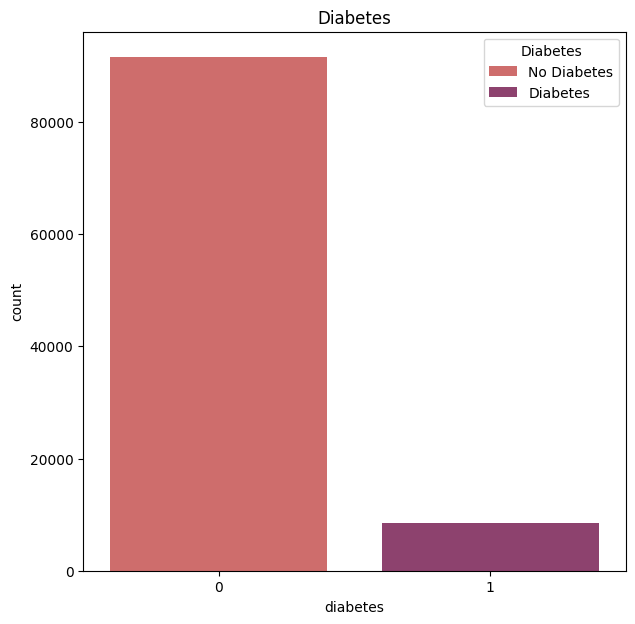

In [15]:
#  Ascertain Diabetes - how many classes are there?
# @title Diabetes feature class
plt.figure(figsize=(7, 7))
graph = sns.countplot(x=df['diabetes'], palette='flare', hue=df['diabetes'],
                      legend=False)
plt.title('Diabetes')
plt.legend(title='Diabetes', loc='upper right', labels=['No Diabetes',
                                                        'Diabetes'])
plt.show(graph)

We are able to see that there are two classes - Diabetes or No Diabetes.
Let's look at the two factors that are used to diagnose diabetes, Blood Glucose and HbA1c levels.

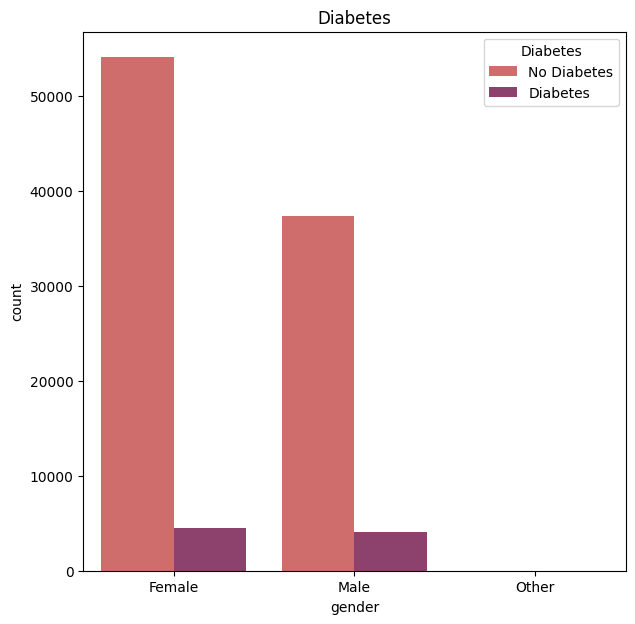

In [16]:
#  Ascertain Gender - how many classes are there?
#  @title Gender feature class
plt.figure(figsize=(7, 7))
graph = sns.countplot(x=df['gender'], palette='flare', hue=df['diabetes'],
                      legend=False)
plt.title('Diabetes')
plt.legend(title='Diabetes', loc='upper right', labels=['No Diabetes',
                                                        'Diabetes'])
plt.show(graph)

There are three categories for Gender in this dataset; female, male and other.

As the provenence of the country that this data has not been provided by the creator; we defer to the probability that this data may have come from a country that legally recognises that there is not a binary response to gender, and as such, will not alter the data for this.


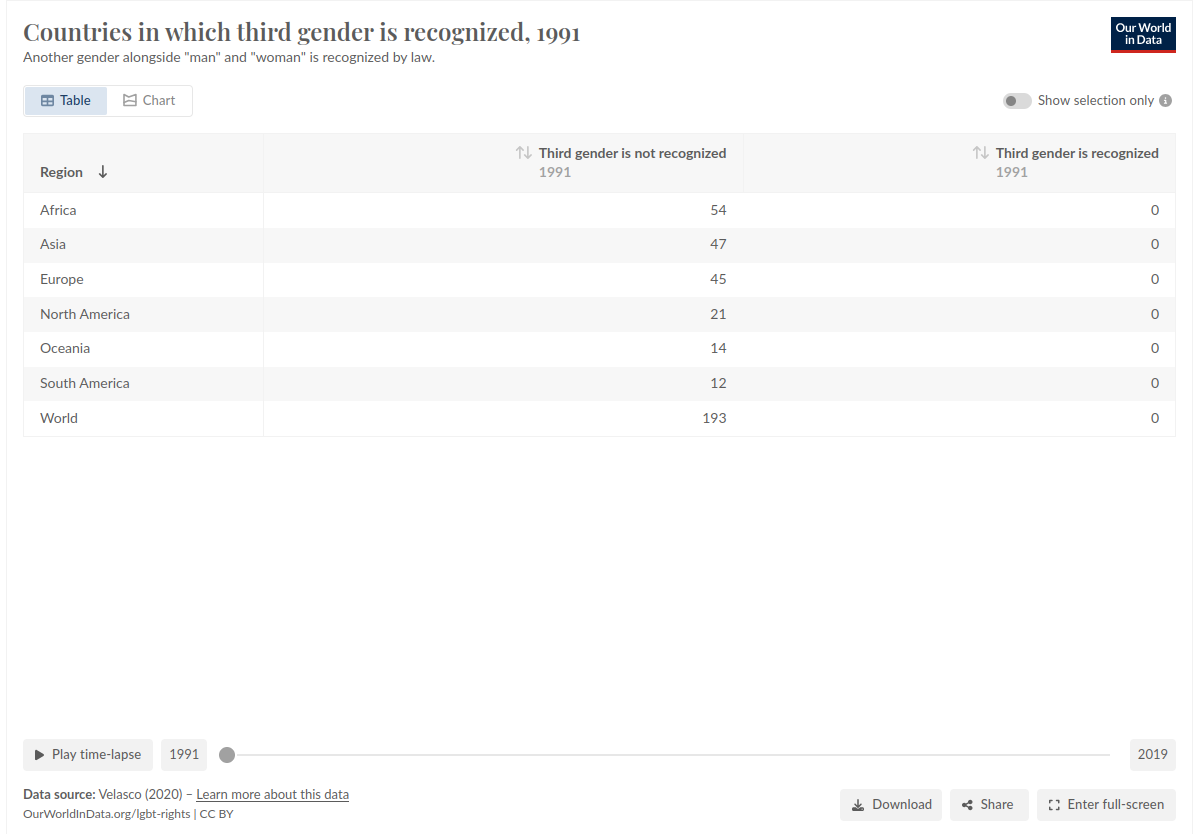

Reference: Velasco (2020) – with major processing by Our World in Data. “Third gender is recognized” [dataset]. Velasco, “LGBT+ policies (Kristopher Velasco)” [original data], ('https://ourworldindata.org/grapher/countries-third-gender-recognized?tab=table&time=earliest').

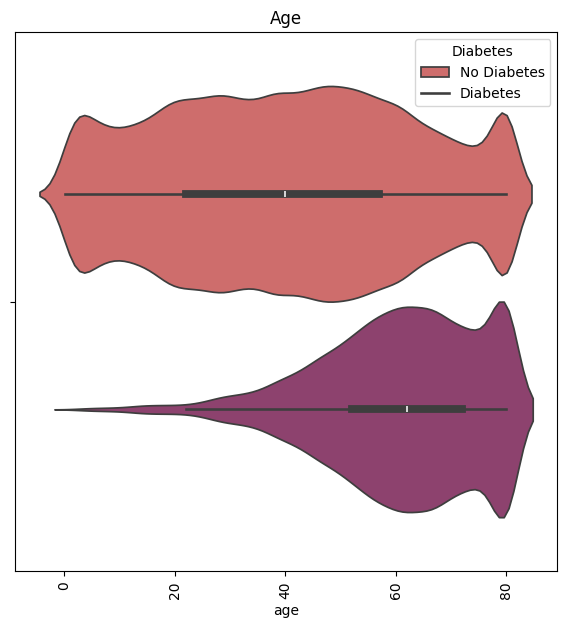

In [17]:
#  Ascertain Age - how many classes are there?
#  @title Age feature class
plt.figure(figsize=(7, 7))
graph = sns.violinplot(x=df['age'], palette='flare', hue=df['diabetes'],
                       legend=True)
plt.title('Age')
plt.legend(title='Diabetes', loc='upper right', labels=['No Diabetes',
                                                        'Diabetes'])
plt.xticks(rotation=90)
plt.show(graph)

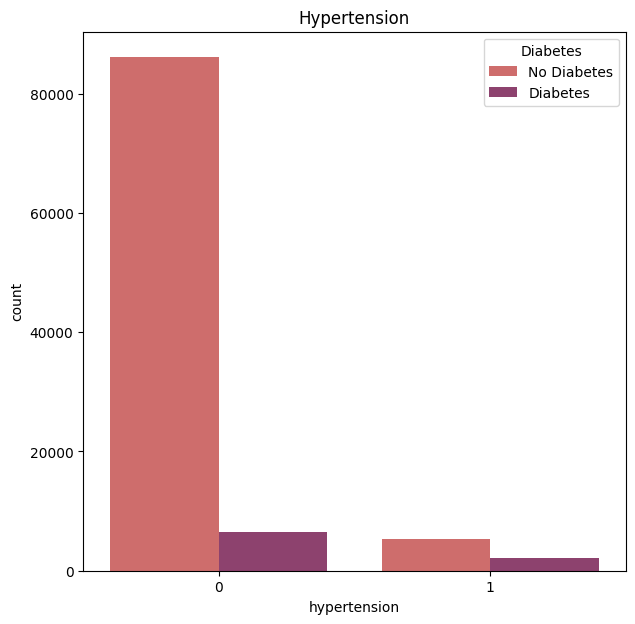

In [18]:
#  Ascertain Hypertension - how many classes are there?
#  @title Hypertension feature class
plt.figure(figsize=(7, 7))
graph = sns.countplot(x=df['hypertension'], palette='flare',
                      hue=df['diabetes'], legend=False)
plt.title('Hypertension')
plt.legend(title='Diabetes', loc='upper right', labels=['No Diabetes',
                                                        'Diabetes'])
plt.show(graph)

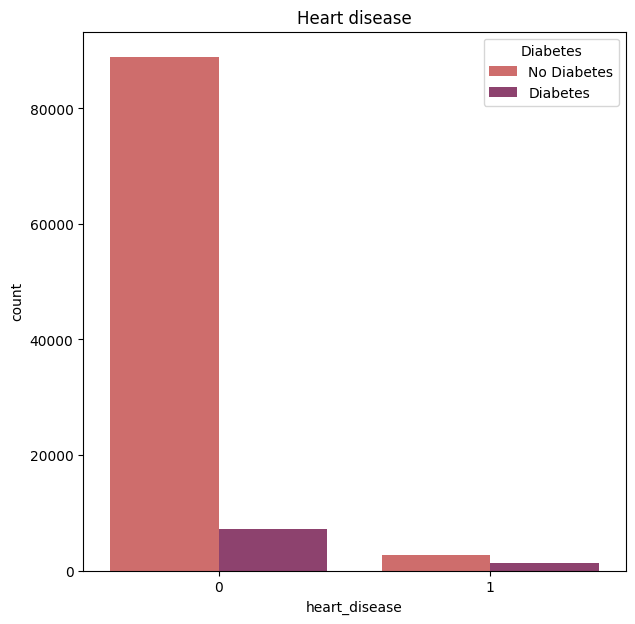

In [19]:
#  Ascertain Heart disease - how many classes are there?
#  @title Heart disease feature class
plt.figure(figsize=(7, 7))
graph = sns.countplot(x=df['heart_disease'], palette='flare',
                      hue=df['diabetes'], legend=False)
plt.title('Heart disease')
plt.legend(title='Diabetes', loc='upper right', labels=['No Diabetes',
                                                        'Diabetes'])
plt.show(graph)

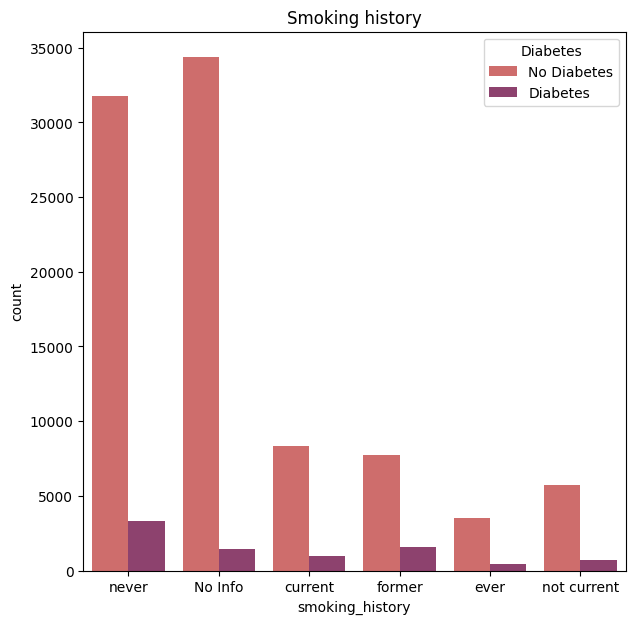

In [20]:
#  Ascertain Smoking history - how many classes are there?
#  @title Smoking history feature class
plt.figure(figsize=(7, 7))
graph = sns.countplot(x=df['smoking_history'], palette='flare',
                      hue=df['diabetes'], legend=False)
plt.title('Smoking history')
plt.legend(title='Diabetes', loc='upper right', labels=['No Diabetes',
                                                        'Diabetes'])
plt.show(graph)

<ipython-input-39-5aa11d7721e7>:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  graph = sns.histplot(x=df['bmi'], palette='flare', bins=20, legend=False)


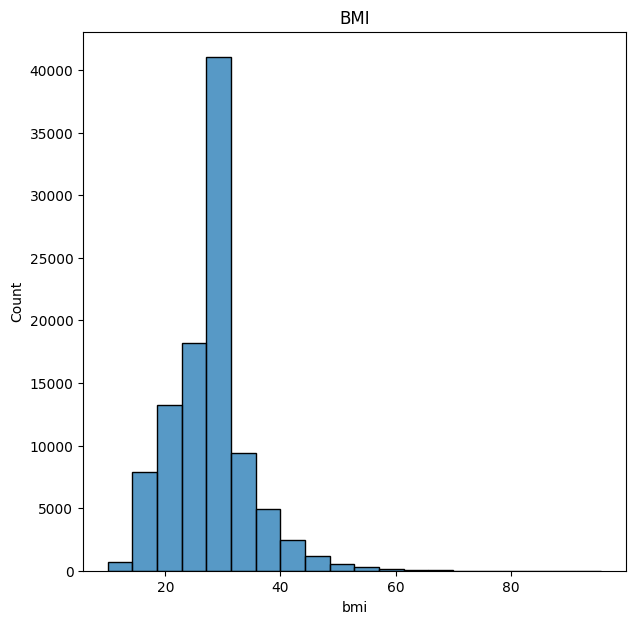

In [39]:
#  Ascertain BMI - how many classes are there?
#  @title BMI feature class
plt.figure(figsize=(7, 7))
graph = sns.histplot(x=df['bmi'], palette='flare', bins=20, legend=False)
plt.title('BMI')
plt.show(graph)

BMI of 10 is very low - and in line with anorexia; Frølich J, Palm CV, Støving RK. To the limit of extreme malnutrition. Nutrition. 2016 Jan;32(1):146-8. doi: 10.1016/j.nut.2015.08.024. Epub 2015 Sep 28. PMID: 26520917. (https://pubmed.ncbi.nlm.nih.gov/26520917/)

BMI over 40 is classified as class III obesity.  

The following BMI ranges (in kg/m2) classify different weight types:
    Underweight: Less than 18.5.
    Optimum range: 18.5 to 24.9.
    Overweight: 25 to 29.9.
    Class I obesity: 30 to 34.9.
    Class II obesity: 35 to 39.9.
    Class III obesity: More than 40.

Cleveland Clinic, Class III Obesity (Formerly Known as Morbid Obesity), (https://my.clevelandclinic.org/health/diseases/21989-class-iii-obesity-formerly-known-as-morbid-obesity)

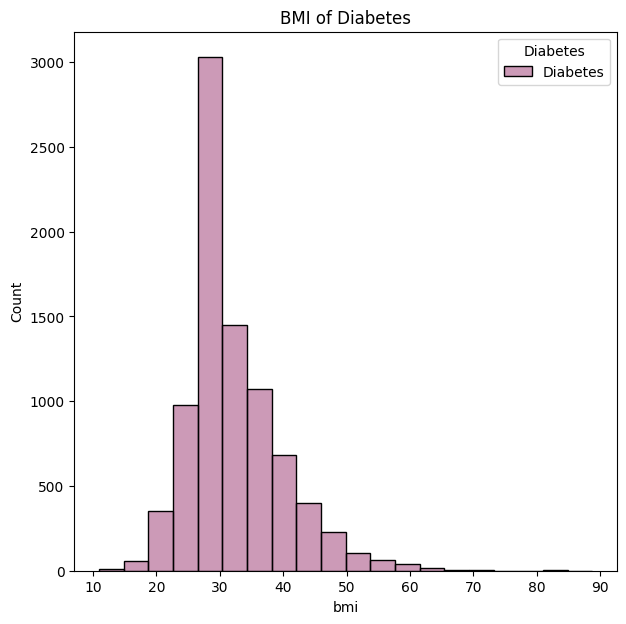

In [28]:
#  Ascertain BMI - how many classes are there?
#  @title BMI feature class
df2 = df.copy()
df2 = df2.loc[df2.diabetes == 1]
plt.figure(figsize=(7, 7))
graph = sns.histplot(x=df2['bmi'], palette='flare', bins=20,
                     hue=df['diabetes'], legend=False)
plt.title('BMI of Diabetes')
plt.legend(title='Diabetes', loc='upper right', labels=['Diabetes'])
plt.show(graph)

In [36]:
df2.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.0
mean,60.946588,0.245647,0.149059,31.988382,6.934953,194.094706,1.0
std,14.549880,0.430496,0.356167,7.558371,1.076562,58.641111,0.0
min,3.000000,0.000000,0.000000,10.980000,5.700000,126.000000,1.0
25%,52.000000,0.000000,0.000000,27.320000,6.100000,145.000000,1.0
50%,62.000000,0.000000,0.000000,29.970000,6.600000,160.000000,1.0
75%,72.000000,0.000000,0.000000,35.912500,7.500000,240.000000,1.0
max,80.000000,1.000000,1.000000,88.720000,9.000000,300.000000,1.0


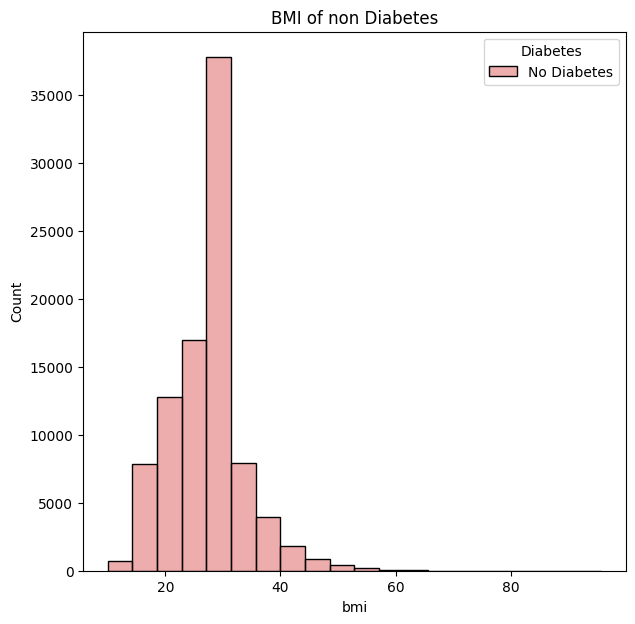

In [29]:
#  Ascertain BMI - how many classes are there?
#  @title BMI feature class
df3 = df.copy()
df3 = df3.loc[df3.diabetes == 0]
plt.figure(figsize=(7, 7))
graph = sns.histplot(x=df3['bmi'], palette='flare', bins=20,
                     hue=df['diabetes'], legend=False)
plt.title('BMI of non Diabetes')
plt.legend(title='Diabetes', loc='upper right', labels=['No Diabetes'])
plt.show(graph)

In [37]:
df3.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,91500.000000,91500.000000,91500.000000,91500.000000,91500.000000,91500.000000,91500.0
mean,40.115187,0.058984,0.029235,26.887163,5.396761,132.852470,0.0
std,22.306005,0.235595,0.168465,6.373406,0.971628,34.247281,0.0
min,0.080000,0.000000,0.000000,10.010000,3.500000,80.000000,0.0
25%,22.000000,0.000000,0.000000,23.240000,4.800000,100.000000,0.0
50%,40.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.0
75%,57.000000,0.000000,0.000000,28.870000,6.200000,158.000000,0.0
max,80.000000,1.000000,1.000000,95.690000,6.600000,200.000000,0.0


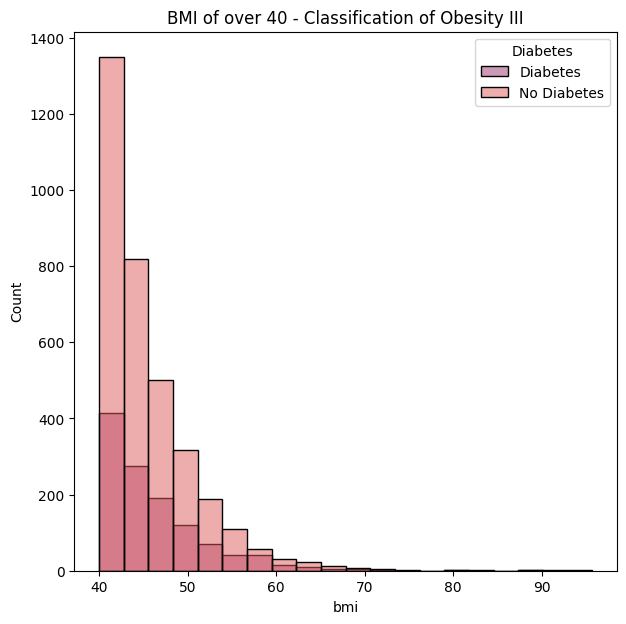

In [77]:
#  Ascertain BMI - how many classes are there?
#  @title BMI feature class
df4 = df.copy()
df4 = df.loc[df.bmi >= 40]
plt.figure(figsize=(7, 7))
graph = sns.histplot(x=df4['bmi'], palette='flare', bins=20,
                     hue=df['diabetes'], legend=False)
plt.title('BMI of over 40 - Classification of Obesity III')
plt.legend(title='Diabetes', loc='upper right', labels=['Diabetes',
                                                        'No Diabetes'])
plt.show(graph)

In [35]:
df4.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,4621.000000,4621.000000,4621.000000,4621.000000,4621.000000,4621.000000,4621.000000
mean,47.111015,0.162086,0.049989,45.668576,5.781086,148.114477,0.258602
std,15.238792,0.368570,0.217946,5.660231,1.188787,49.493002,0.437914
min,2.000000,0.000000,0.000000,40.000000,3.500000,80.000000,0.000000
25%,36.000000,0.000000,0.000000,41.690000,5.000000,126.000000,0.000000
50%,47.000000,0.000000,0.000000,44.000000,6.000000,145.000000,0.000000
75%,59.000000,0.000000,0.000000,47.980000,6.500000,159.000000,1.000000
max,80.000000,1.000000,1.000000,95.690000,9.000000,300.000000,1.000000


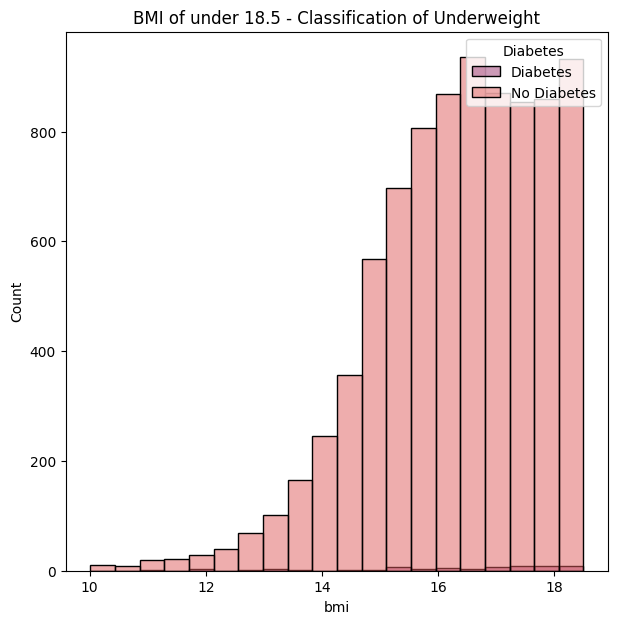

In [78]:
#  Ascertain BMI - how many classes are there?
#  @title BMI feature class
df5 = df.copy()
df5 = df5.loc[df5.bmi <= 18.5]
plt.figure(figsize=(7, 7))
graph = sns.histplot(x=df5['bmi'], palette='flare', bins=20,
                     hue=df['diabetes'], legend=False)
plt.title('BMI of under 18.5 - Classification of Underweight')
plt.legend(title='Diabetes', loc='upper right', labels=['Diabetes',
                                                        'No Diabetes'])
plt.show(graph)

In [80]:
df5.describe()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
count,8521.000000,8521.000000,8521.000000,8521.000000,8521.000000,8521.000000,8521.000000,8521.000000,8521.000000
mean,0.481868,10.532801,0.006455,0.005516,0.883347,16.327369,5.415468,133.456167,0.007511
std,0.500170,15.628565,0.080086,0.074068,1.662767,1.457784,0.985964,34.879124,0.086344
min,0.000000,0.080000,0.000000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,0.000000,2.000000,0.000000,0.000000,0.000000,15.400000,4.800000,100.000000,0.000000
50%,0.000000,6.000000,0.000000,0.000000,0.000000,16.470000,5.800000,140.000000,0.000000
75%,1.000000,10.000000,0.000000,0.000000,0.000000,17.500000,6.200000,158.000000,0.000000
max,2.000000,80.000000,1.000000,1.000000,5.000000,18.500000,9.000000,280.000000,1.000000


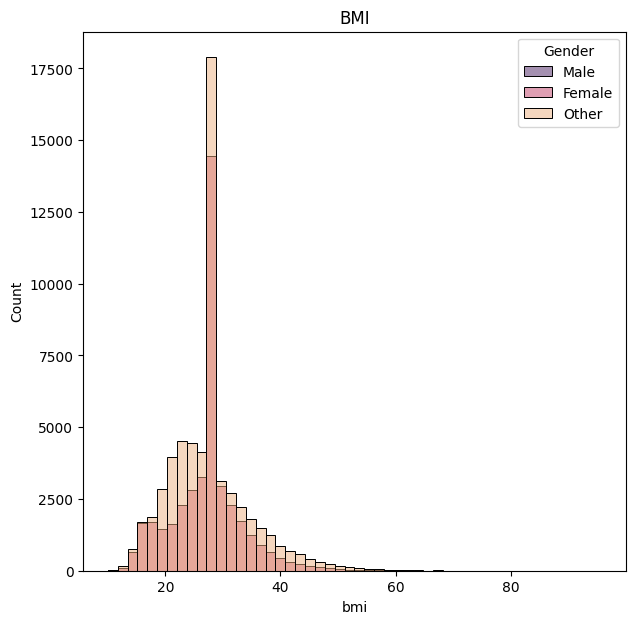

In [81]:
#  Ascertain BMI - how many classes are there?
#  @title BMI feature class by gender
plt.figure(figsize=(7, 7))
graph = sns.histplot(x=df['bmi'], palette='flare', bins=50, hue=df['gender'],
                     legend=False)
plt.title('BMI')
plt.legend(title='Gender', loc='upper right', labels=['Male', 'Female',
                                                      'Other'])
plt.show(graph)

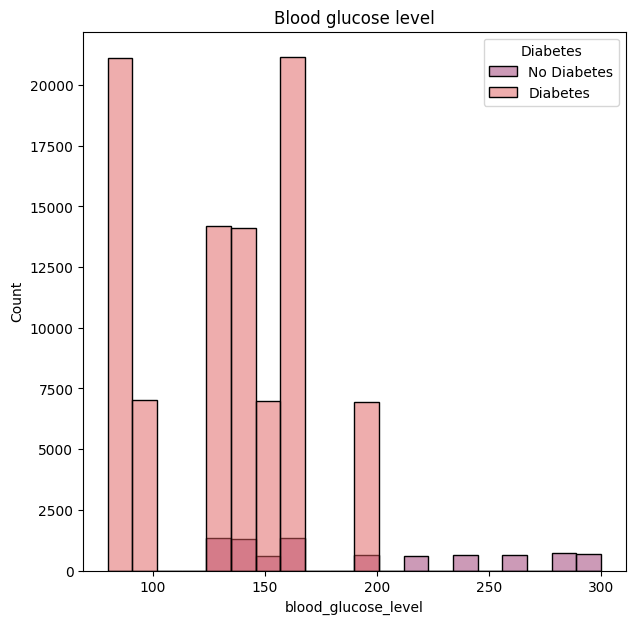

In [82]:
#  Ascertain Blood glucose level - how many classes are there?
#  @title Blood glucose level feature class
plt.figure(figsize=(7, 7))
graph = sns.histplot(x=df['blood_glucose_level'], palette='flare', bins=20,
                     hue=df['diabetes'], legend=False)
plt.title('Blood glucose level')
plt.legend(title='Diabetes', loc='upper right', labels=['No Diabetes',
                                                        'Diabetes'])
plt.show(graph)

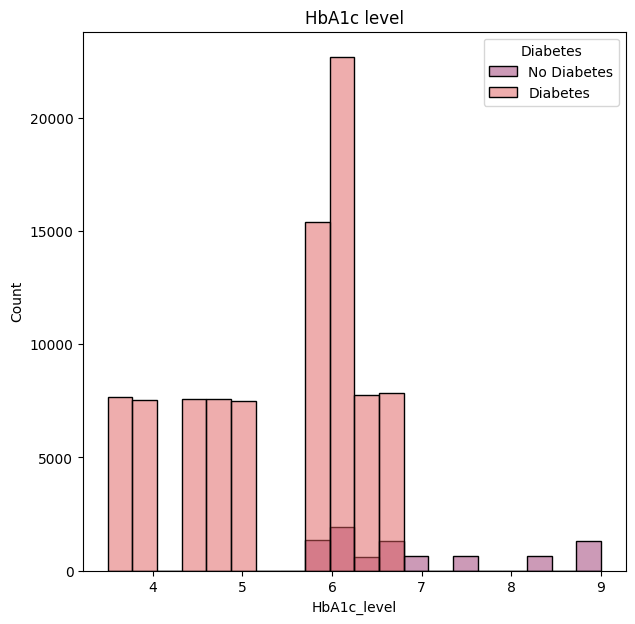

In [83]:
#  Ascertain HbA1c level - how many classes are there?
#  @title HbA1c level feature class
plt.figure(figsize=(7, 7))
graph = sns.histplot(x=df['HbA1c_level'], palette='flare', bins=20,
                     hue=df['diabetes'], legend=False)
plt.title('HbA1c level')
plt.legend(title='Diabetes', loc='upper right', labels=['No Diabetes',
                                                        'Diabetes'])
plt.show(graph)

In order to assess the feasibility of the data, we will need to look at details for what is feasible for diabetes, as both HbA1c and Blood Glucose results are very different.

Comparison table to display the difference between No Diabetes, Pre Diabetes and Diabetes in HbA1c Result.

Pathology Tests Explained,  "HbA1c; Haemoglobin A1c, glycated haemoglobin, glycosylated haemoglobin", (https://pathologytestsexplained.org.au/ptests.php?q=HbA1c)


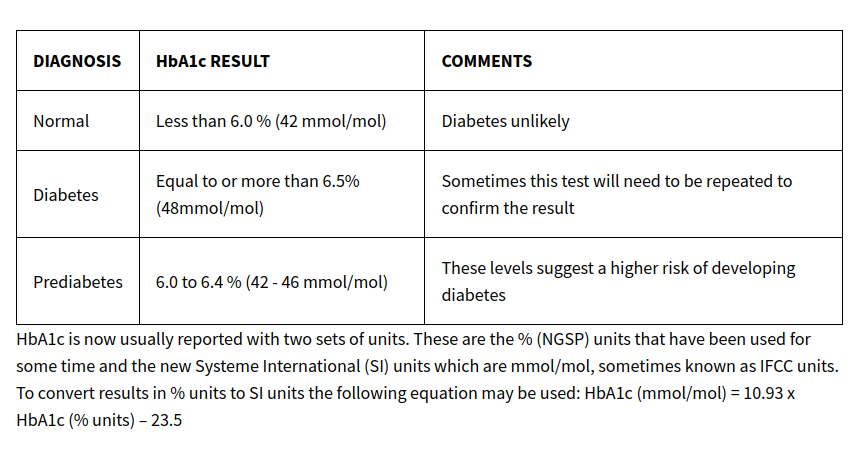

To help with the conversion - as some of the values are in mg/dl not mmol/L, please refer to the below table.  Please note; this is not standard - it is practice to either be mg/dl or mmol/L for both.

For reference- HbA1c ≥6.5% (48 mmol/mol) is the threshold for Diabetes diagnosis (from the HbA1c metric).

(Reference - https://danii.org.au/conversion-table-for-blood-glucose-monitoring/, The DANII Foundation)

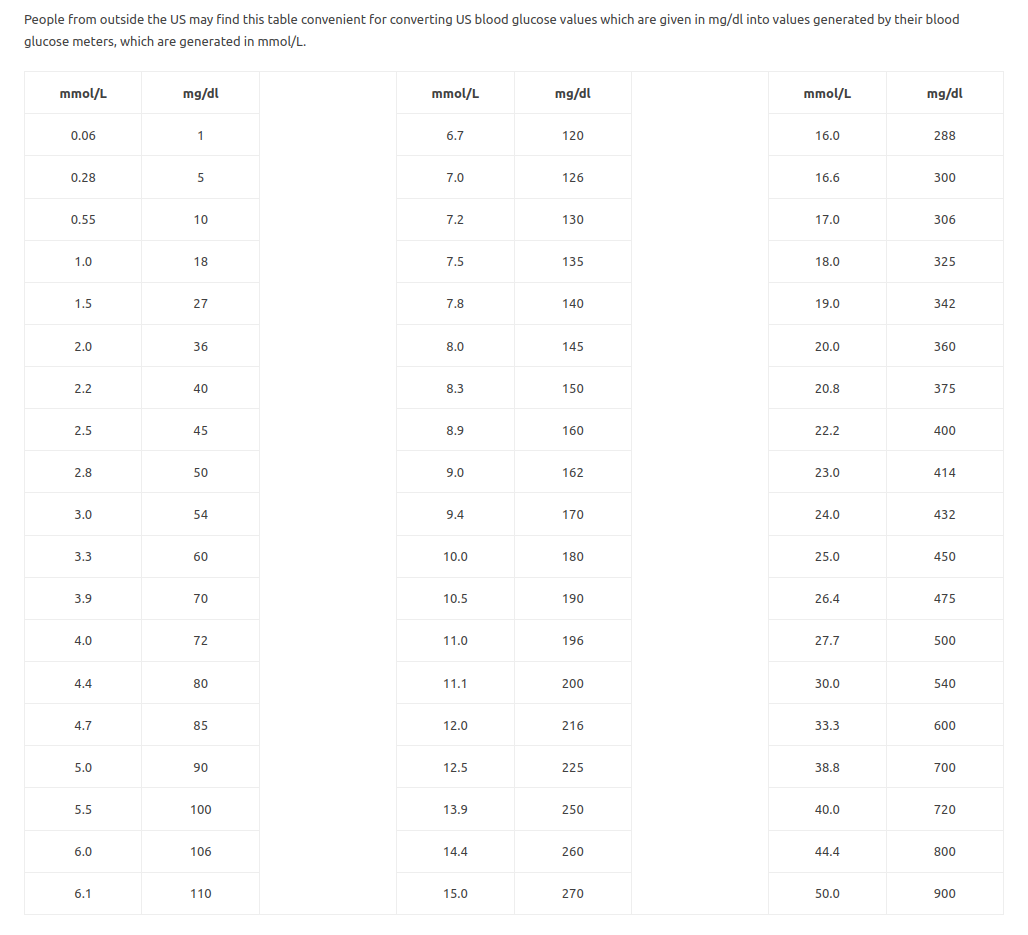

Looking into HbA1c results - we have added in reference lines to show the threshold for a diagnosis of prediabetes (orange) and diabetes (red).

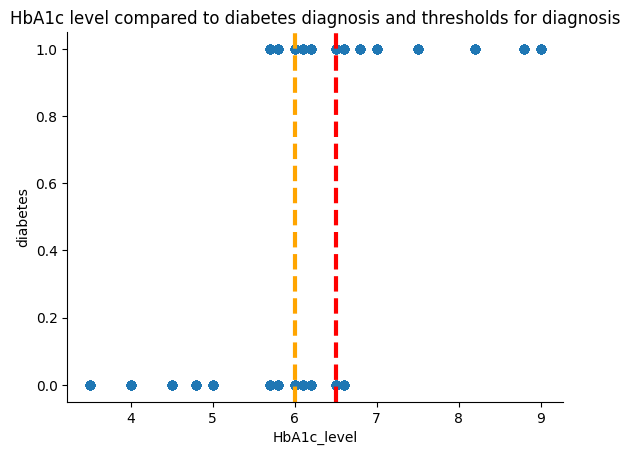

In [84]:
# @title HbA1c level compared to diabetes, with diagnostic thresholds listed
df.plot(kind='scatter', x='HbA1c_level', y='diabetes', s=32)
plt.axvline(x=6, linewidth=3, color='orange', ls='--')
plt.axvline(x=6.5, linewidth=3, color='red', ls='--')
plt.title('HbA1c level compared to diabetes diagnosis thresholds')
plt.gca().spines[['top', 'right',]].set_visible(False)

As can be seen; there does appear to be a split with lower HbA1c levels showing as not diabetic, and higher as diabetic.

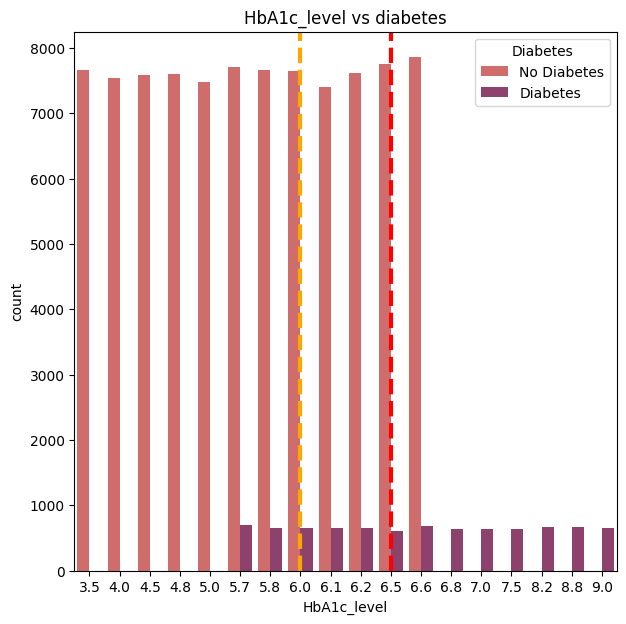

In [85]:
#  Plot setup
plt.figure(figsize=(7, 7))
graph = sns.countplot(x=df['HbA1c_level'], palette='flare', hue=df['diabetes'],
                      legend=False)
plt.title('HbA1c_level vs diabetes')
plt.legend(title='Diabetes', loc='upper right', labels=['No Diabetes',
                                                        'Diabetes'])
plt.axvline(x=10, linewidth=3, color='red', ls='--')
plt.axvline(x=7, linewidth=3, color='orange', ls='--')
plt.show(graph)

Of note; there do appear to be a few with lower HbA1c that are listed with diabetes.

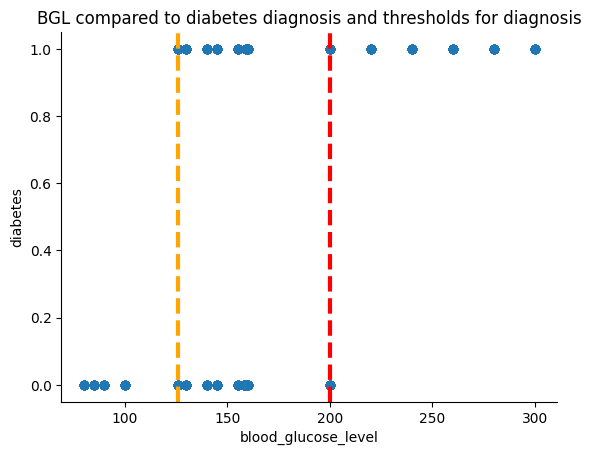

In [86]:
# @title Blood glucose level vs diabetes
df.plot(kind='scatter', x='blood_glucose_level', y='diabetes', s=32, alpha=.8)
plt.axvline(x=126, linewidth=3, color='orange', ls='--')
plt.axvline(x=200, linewidth=3, color='red', ls='--')
plt.title('BGL compared to diabetes diagnosis and thresholds for diagnosis')
plt.gca().spines[['top', 'right',]].set_visible(False)

Similar to the previous chart; there does appear to be a split with lower BGL  showing as not diabetic, and higher as diabetic.

However; as Blood Glucose (and HbA1c) are used to diagnose diabetes based on threshold values; this does not look correct.  

1.  We do not know what the Blood Glucose value is here - is it fasting, 2hr,. random?  As such, it is impossible to tell what the metric is here.  
2.  It appears that the values cut over perfectly at each threshold - whilst diabetes is diagnosed by the value; it seems unlikely to have this perfect split.
2.  There are no values below the threshold which are listed as diabetic, which does not seem likely.  A person with diabetes who is managing their condition would have values in the lower range, however, none are present here.

This leads us to believe that this data may not be accurate or correct data.

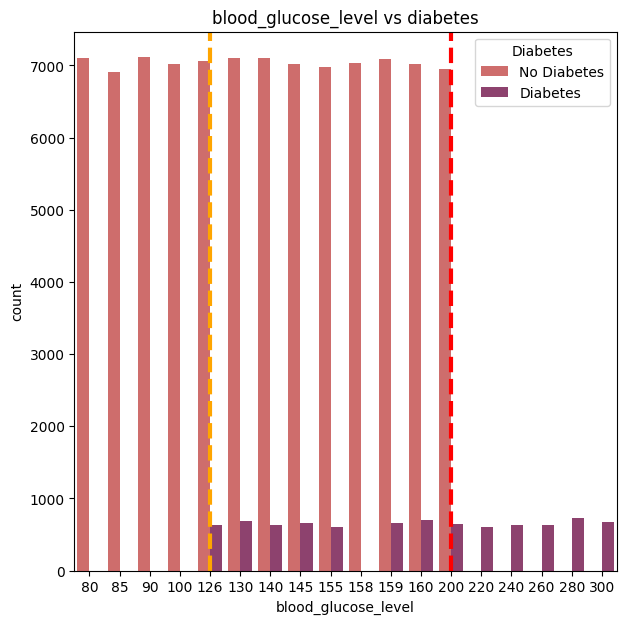

In [87]:
#  Plot setup
plt.figure(figsize=(7, 7))
graph = sns.countplot(x=df['blood_glucose_level'], palette='flare',
                      hue=df['diabetes'], legend=False)
plt.title('blood_glucose_level vs diabetes')
plt.legend(title='Diabetes', loc='upper right', labels=['No Diabetes',
                                                        'Diabetes'])
plt.axvline(x=4, linewidth=3, color='orange', ls='--')
plt.axvline(x=12, linewidth=3, color='red', ls='--')
plt.show(graph)

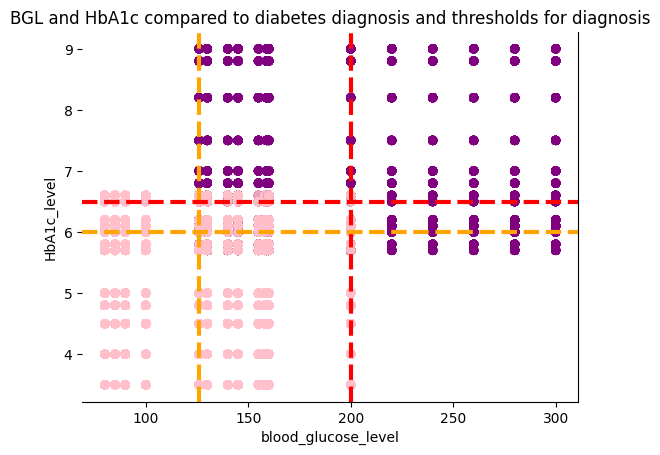

In [88]:
# @title BGL and HbA1c compared to diabetes diagnosis and thresholds
cols = pltcolor(df.diabetes)
df.plot(kind='scatter', x='blood_glucose_level', y='HbA1c_level', s=32,
        alpha=.8, c=cols, legend=False)
plt.title('BGL, HbA1c compared to diabetes diagnosis thresholds for diagnosis')
plt.axvline(x=126, linewidth=3, color='orange', ls='--')
plt.axvline(x=200, linewidth=3, color='red', ls='--')
plt.axhline(y=6, linewidth=3, color='orange', ls='--')
plt.axhline(y=6.5, linewidth=3, color='red', ls='--')
plt.gca().spines[['top', 'left',]].set_visible(False)

Looking at the comparison; it appears that there has been a cut and paste of values - without really knowing the metrics, and having no diabetics showing with lower BGL or HbA1c, this does not look correct entirely.  

It appears that all persons have been listed as diabetic when they hit the prediabetic range in Blood Glucose; it doesn't seem accurate.

There are also no people listed as diabetic who have blood that is managed and controlled and showing in the non diabetic range, which seems unlikely.

Rather than these appearing to be outliers, it appears that the data overall, when combined with a refusal to provide provenance, means that this data is not reliable.


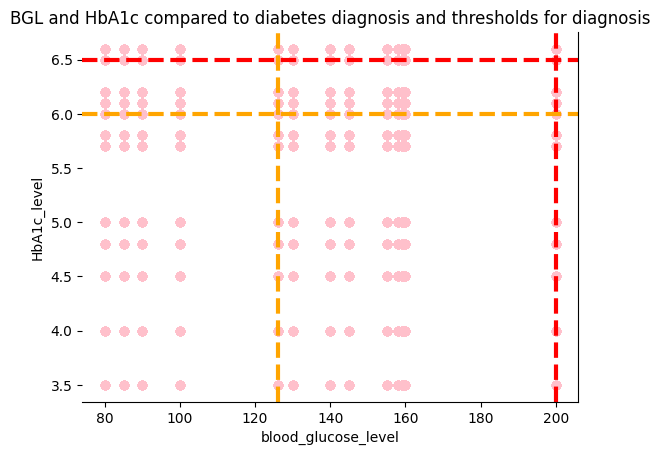

In [89]:
# @title BGL and HbA1c compared to diabetes negative diagnosis and thresholds
dfb = df.copy()
dfb = dfb.loc[dfb.diabetes == 0]
dfb.plot(kind='scatter', x='blood_glucose_level', y='HbA1c_level',
         s=32, alpha=.8, c='pink', legend=False)
plt.title('BGL and HbA1c compared to diabetes diagnosis and thresholds')
plt.axvline(x=126, linewidth=3, color='orange', ls='--')
plt.axvline(x=200, linewidth=3, color='red', ls='--')
plt.axhline(y=6, linewidth=3, color='orange', ls='--')
plt.axhline(y=6.5, linewidth=3, color='red', ls='--')
plt.gca().spines[['top', 'left',]].set_visible(False)

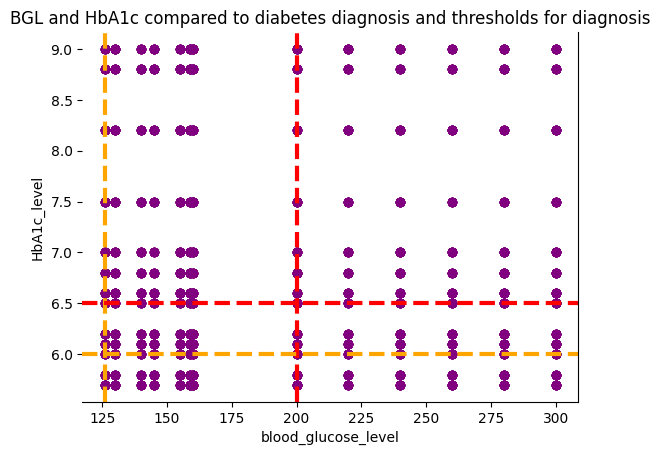

In [108]:
# @title BGL and HbA1c compared to diabetes positive diagnosis and thresholds
dfnb = df.copy()
dfnb = dfnb.loc[dfnb.diabetes == 1]
dfnb.plot(kind='scatter', x='blood_glucose_level', y='HbA1c_level', s=32,
          c='purple', alpha=.8, legend=False)
plt.title('BGL and HbA1c compared to diabetes diagnosis and thresholds')
plt.axvline(x=126, linewidth=3, color='orange', ls='--')
plt.axvline(x=200, linewidth=3, color='red', ls='--')
plt.axhline(y=6, linewidth=3, color='orange', ls='--')
plt.axhline(y=6.5, linewidth=3, color='red', ls='--')
plt.gca().spines[['top', 'left',]].set_visible(False)

Looking at the breakdown - the fact that the blood glucose has an exact max of 300 seems unlikely; BGL goes significantly higher, but is usually not reported as BGL about 300 should have you in hospital.

Whilst normally I would remove outliers from data; as it is medical data, and all of these values are technically possible - I am leaving them in now to see if we can assess further the accuracy of this data.

Creating a model for the data.

In [65]:
#  Pre-process the data with Label encode
#  Label encode the two text-based columns;
#  then use this to retrieve the dictionary to view.
lab_e = LabelEncoder()  # Get the label encoder
lab_e.fit(df['gender'])  # Fit-transform gender
#  Encode and label
lab_e_gender = dict(zip(lab_e.classes_, lab_e.transform(lab_e.classes_)))
df['gender'] = lab_e.fit_transform(df['gender'])  # Encode over the original
print("Gender encoded")
lab_e.fit(df['smoking_history'])  # Fit-transform smoking history
#  Encode and label
lab_e_smoking = dict(zip(lab_e.classes_, lab_e.transform(lab_e.classes_)))
#  Encode over the original column
df['smoking_history'] = lab_e.fit_transform(df['smoking_history'])
print("Smoking history encoded")
print("The new labels for, and details for gender are: ", lab_e_gender)
print("The new labels for, and details for snoking history: ", lab_e_smoking)

Gender encoded
Smoking history encoded
The new labels for, and details for gender are:  {'Female': 0, 'Male': 1, 'Other': 2}
The new labels for, and details for snoking history are:  {'No Info': 0, 'current': 1, 'ever': 2, 'former': 3, 'never': 4, 'not current': 5}


In [66]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0


In [67]:
#  Check to see if the Dtype has updated from Text
print("=======================================================")
print("Check file info:")
print("=======================================================")
print(df.info())
print("=======================================================")
#  Check the number of dimensions:
print('The number of dimensions in the data is/are:', df.ndim)
print("=======================================================")

Check file info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  int64  
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  int64  
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(6)
memory usage: 6.9 MB
None
The number of dimensions in the data is/are: 2


Use this to plot a correlation matrix heatmap to assess data.

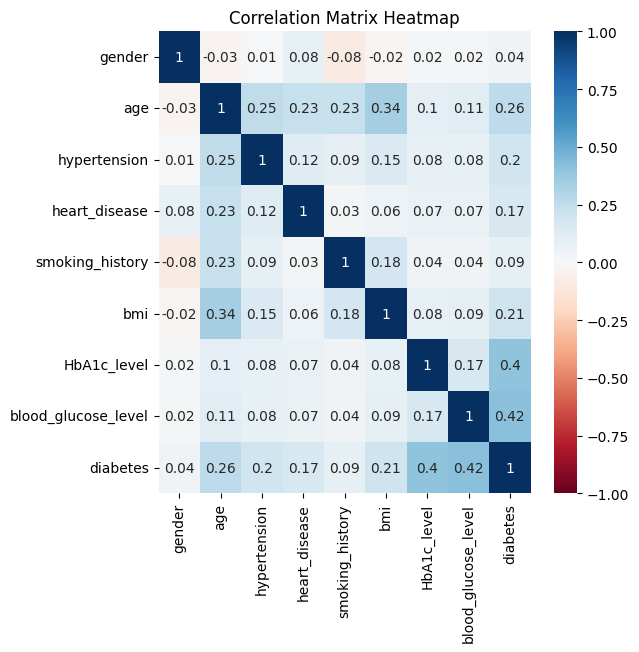

In [68]:
plt.figure(figsize=(6, 6), dpi=100)
corr = df.corr()
sns.heatmap(round(corr, 2), cmap='RdBu', vmin=-1, vmax=1, annot=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

Interestingly enough; despite Blood Glucose Level being the criteria for diagnosis for diabetes, it appears to only be moderate correlation between Blood Glucose Level and diabetes.  Given that diabetes is diagnosed by this, it seems unlikely.


In [104]:
df.groupby('blood_glucose_level').count()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,diabetes
blood_glucose_level,,,,,,,,
80,7106,7106,7106,7106,7106,7106,7106,7106
85,6901,6901,6901,6901,6901,6901,6901,6901
90,7112,7112,7112,7112,7112,7112,7112,7112
100,7025,7025,7025,7025,7025,7025,7025,7025
126,7702,7702,7702,7702,7702,7702,7702,7702
130,7794,7794,7794,7794,7794,7794,7794,7794
140,7732,7732,7732,7732,7732,7732,7732,7732
145,7679,7679,7679,7679,7679,7679,7679,7679
155,7575,7575,7575,7575,7575,7575,7575,7575


The Blood Glucose numbers do not seemvery believable.  They are rounded numbers in most cases, with only a few variations.

In [106]:
df.groupby('HbA1c_level').count()

,gender,age,hypertension,heart_disease,smoking_history,bmi,blood_glucose_level,diabetes
HbA1c_level,,,,,,,,
3.5,7662,7662,7662,7662,7662,7662,7662,7662
4.0,7542,7542,7542,7542,7542,7542,7542,7542
4.5,7585,7585,7585,7585,7585,7585,7585,7585
4.8,7597,7597,7597,7597,7597,7597,7597,7597
5.0,7471,7471,7471,7471,7471,7471,7471,7471
5.7,8413,8413,8413,8413,8413,8413,8413,8413
5.8,8321,8321,8321,8321,8321,8321,8321,8321
6.0,8295,8295,8295,8295,8295,8295,8295,8295
6.1,8048,8048,8048,8048,8048,8048,8048,8048


The HbA1c numbers do seem more believable, with a more believable spread.

Of note - there are only 18 variations in value for both Blood Glucose Level and for HbA1c levels.  This does not seem at all reliable, and appears to show that perhaps one set of value was created, then converted to the other.  

This is not actually possible to do, as you can not accurately convert from HbA1c level to Blood Glucose, as they are not the same measure.

HbA1c is a measure of approx; 90 days; whereas Blood Glucose is a point in time; whilst you can not predict between the two, there is a degree of correlation.

In [109]:
pd.crosstab(df.HbA1c_level, df.blood_glucose_level, margins=True,
            margins_name='Grand Total')

blood_glucose_level,80,85,90,100,126,130,140,145,155,158,159,160,200,220,240,260,280,300,Grand Total
HbA1c_level,,,,,,,,,,,,,,,,,,,
3.5,561,583,591,605,601,601,589,583,601,547,607,588,605,0,0,0,0,0,7662
4.0,607,599,599,525,577,608,580,560,603,611,582,545,546,0,0,0,0,0,7542
4.5,589,554,561,578,596,623,565,603,577,601,571,589,578,0,0,0,0,0,7585
4.8,566,601,572,590,596,604,612,573,596,566,579,574,568,0,0,0,0,0,7597
5.0,584,595,583,566,571,510,623,574,553,557,606,592,557,0,0,0,0,0,7471
5.7,608,583,618,552,655,675,633,667,659,578,660,654,613,42,44,57,62,53,8413
5.8,639,547,570,547,631,631,639,707,650,572,665,651,609,48,51,51,61,52,8321
6.0,601,563,595,619,646,650,663,610,630,643,608,611,610,43,56,47,55,45,8295
6.1,552,551,576,575,617,607,636,629,585,574,615,643,635,43,52,52,49,57,8048


In [110]:
#  Diabetes
pd.crosstab(df2.HbA1c_level, df2.blood_glucose_level, margins=True,
            margins_name='Grand Total')

blood_glucose_level,126,130,140,145,155,159,160,200,220,240,260,280,300,Grand Total
HbA1c_level,,,,,,,,,,,,,,
5.7,52,62,44,61,45,61,62,59,42,44,57,62,53,704
5.8,47,51,39,57,45,46,63,48,48,51,51,61,52,659
6.0,49,45,50,57,61,50,44,45,43,56,47,55,45,647
6.1,59,53,61,55,31,51,48,40,43,52,52,49,57,651
6.2,44,48,47,62,35,56,55,48,46,52,52,58,45,648
6.5,40,43,41,41,44,44,55,55,43,47,50,54,56,613
6.6,52,63,51,44,53,55,56,40,52,39,54,65,59,683
6.8,53,45,47,42,50,58,41,59,46,52,39,58,52,642
7.0,46,49,48,31,53,41,47,56,46,56,52,54,55,634


In [111]:
#  Non Diabetes
pd.crosstab(df3.HbA1c_level, df3.blood_glucose_level, margins=True,
            margins_name='Grand Total')

blood_glucose_level,80,85,90,100,126,130,140,145,155,158,159,160,200,Grand Total
HbA1c_level,,,,,,,,,,,,,,
3.5,561,583,591,605,601,601,589,583,601,547,607,588,605,7662
4.0,607,599,599,525,577,608,580,560,603,611,582,545,546,7542
4.5,589,554,561,578,596,623,565,603,577,601,571,589,578,7585
4.8,566,601,572,590,596,604,612,573,596,566,579,574,568,7597
5.0,584,595,583,566,571,510,623,574,553,557,606,592,557,7471
5.7,608,583,618,552,603,613,589,606,614,578,599,592,554,7709
5.8,639,547,570,547,584,580,600,650,605,572,619,588,561,7662
6.0,601,563,595,619,597,605,613,553,569,643,558,567,565,7648
6.1,552,551,576,575,558,554,575,574,554,574,564,595,595,7397


Comapring HbA1c by Blood Glucose level - this looks like a created table potentially.  The uniformity, as well as the spread are not feasible.  This appears to not be correct data.

Whilst you can not directly compare Blood Glucose to HbA1c; there is a formula to calculate from HbA1c to Estimated Blood Glucose, which is:  

Estimated average glucose (eAG) = (28.7 x A1C) – 46.7

As such; none of the above results are at all likely.



Overall, this data does not appear to be accuarate, and there are questions about it.  As the author will not provide any provenance for the data, it appears that it is not a reliable source of data, and as such, should not be used for assessing features to assess for Diabetes or medical requirements.